In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import pandas as pd

In [2]:
RANDOM_SEED = 0x0

# TASK 1 (2 Points): 

We work with the "Wine Recognition" dataset. You can read more about this dataset at [https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset).

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators.
The data is loaded below and split into `data` and `target`. `data` is a `Dataframe` that contains the result of the chemical analysis while `target`contains an integer representing the wine cultivator.

In [3]:
from sklearn.datasets import load_wine
(data, target) = load_wine(return_X_y=True, as_frame=True)

In [4]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

Next, the data is split into training data and testing data.
The training data is used to train the model while the testing data is used to evaluate the model on different data than it was trained for. You will learn later in the course why this is necessary.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)


In the following, we define functions to classify the data. We use a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#tree) and a [Support Vector Classifier](https://scikit-learn.org/stable/modules/svm.html#svm-classification). You will learn later in the course how these classifiers work.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def run_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_test_predicted = clf.predict(X_test)
  return accuracy_score(y_test, y_test_predicted)


def run_decision_tree(X_train, y_train, X_test, y_test):
  clf = DecisionTreeClassifier(random_state=0)
  accuracy = run_classifier(clf, X_train, y_train, X_test, y_test)
  print("The accuracy of the Decision Tree classifier is", accuracy)

def run_svc(X_train, y_train, X_test, y_test):
  clf = SVC(random_state=0)
  accuracy = run_classifier(clf, X_train, y_train, X_test, y_test)
  print("The accuracy of the Support Vector classifier is", accuracy)


### Task 1a: Classify the data

Classify the data by calling the two functions `run_decision_tree` and `run_svc`.
Which classifier works better (i.e. achieves the higher accuracy)?

In [8]:
run_decision_tree(X_train, y_train, X_test, y_test)

run_svc(X_train, y_train, X_test, y_test)

The accuracy of the Decision Tree classifier is 0.9661016949152542
The accuracy of the Support Vector classifier is 0.711864406779661


### Task 1b: Normalize the data with mean and standard deviation

Normalize the training and testing data using the following formula:

$$X_{normalized} = \frac{X-\mu_X}{\sigma_X}$$

Calculate the mean and standard deviation __on the training data__ only (also when you normalize the testing dataset).

`Pandas` provides built-in functions to calculate the average and the standard deviation. For example, `X_train.mean()` returns the average value per feature in the training dataset while `X_train.std()` returns the standard deviation per feature.

In [9]:
def normalize(data_set, train_set):
    return (data_set - train_set.mean()) / train_set.std()

x_train_norm = normalize(X_train, X_train)
y_train_norm = normalize(y_train, y_train)
x_test_norm = normalize(X_test, X_train)
y_test_norm = normalize(y_test, y_train)

Call the two classification functions again with the normalized data and report the changes in accuracy. What do you notice?

In [10]:
run_decision_tree(x_train_norm, y_train, x_test_norm, y_test)

run_svc(x_train_norm, y_train, x_test_norm, y_test)


The accuracy of the Decision Tree classifier is 0.9661016949152542
The accuracy of the Support Vector classifier is 0.9830508474576272


### Task 1c: Repeat Task 1b with min-max Normalization

Repeat the task 1b but use the following formula to normalize tha data:

$$X_{normalized} = \frac{X-X_{min}}{X_{max} - X_{min}}$$

Again, calculate the mean and standard deviation __on the training data__ only (also when you normalize the testing dataset) and use the built-in function `X_train.min()` resp. `X_train.max()`.

In [11]:
def min_max_normalize(data_set, train_set):
    return (data_set - train_set.min()) / (train_set.max() - train_set.min() )

x_train_min_max_norm = min_max_normalize(X_train, X_train)
y_train_min_max_norm = min_max_normalize(y_train, y_train)
x_test_min_max_norm = min_max_normalize(X_test, X_train)
y_test_min_max_norm = min_max_normalize(y_test, y_train)

Call the two classification functions again with the normalized data and report the changes in accuracy. What do you notice?

In [12]:
run_decision_tree(x_train_min_max_norm, y_train, x_test_min_max_norm, y_test)

run_svc(x_train_min_max_norm, y_train, x_test_min_max_norm, y_test)

The accuracy of the Decision Tree classifier is 0.9661016949152542
The accuracy of the Support Vector classifier is 0.9830508474576272


## 📢 **HAND-IN** 📢: Report on Moodle whether you solved this task.

---
# TASK 2 (2 Points): 

In Task 1 we clearly saw that normalization improves the result for Support Vector Classifiers but not for Decision Trees. You will learn later in the course why Decision Trees don't need normalization.

However, to better understand the influence of normalization, we will plot the data with and without normalization.


In [13]:
import seaborn as sns
sns.set_theme(style="ticks")

### Task 2a: Plot the unnormalized data

For simplicity, we only consider only the columns `alcohol` and `malic_acid` from the training dataset.

Create a [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) from the data with  the attribute `alcohol` on the `x`-axis and `malic_acid` on the `y`-axis.

Plot the un-normalized data `X_train` as well as the two noramlized versions from Exercise 1 in the same plot and describe what happens.

__Hint:__ To visualize the data distribution in the same plot just call `sns.scatterplot` three times within the same code-cell.

<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>

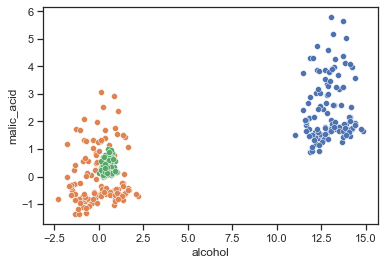

In [14]:
sns.scatterplot(data=X_train, x="alcohol", y="malic_acid")
sns.scatterplot(data=x_train_norm, x="alcohol", y="malic_acid")
sns.scatterplot(data=x_train_min_max_norm, x="alcohol", y="malic_acid")

We will now have a closer look at the data. Calculate for the un-normalized data as well as for the two normalized versions of data

- The average value in the column `avg(alcohol)`
- The standard deviation in the column `std(alcohol)`
- The minimum value in the column `min(alcohol)`
- The maxmium value in the column `max(alcohol)`
- The range in the column by subtracting the minimum of the maximum in the column `max(alcohol) - min(alcohol)`

Compare the properties of the un-normalized data with the normalized data. What do you notice?

In [17]:
def print_val(kind, val, val_norm, val_min_max):
    text = f"{kind} unnorm {val}, norm {val_norm}, min max norm {val_min_max}"
    print(text)

def min_max(val):
    return np.max(val) - np.min(val)


print_val("avg", np.average(X_train.alcohol), np.average(x_train_norm.alcohol),np.average(x_train_min_max_norm.alcohol))
print_val("std", np.std(X_train.alcohol), np.std(x_train_norm.alcohol),np.std(x_train_min_max_norm.alcohol))
print_val("min", np.min(X_train.alcohol), np.min(x_train_norm.alcohol),np.min(x_train_min_max_norm.alcohol))
print_val("max", np.max(X_train.alcohol), np.max(x_train_norm.alcohol),np.max(x_train_min_max_norm.alcohol))
print_val("min-max", min_max(X_train.alcohol), min_max(x_train_norm.alcohol), min_max(x_train_min_max_norm.alcohol))


avg unnorm 12.971008403361346, norm 9.26429801220824e-16, min max norm 0.5107916850950908
std unnorm 0.8483878878984218, norm 0.9957894549830614, min max norm 0.22325997049958463
min unnorm 11.03, norm -2.2782452786880842, min max norm 0.0
max unnorm 14.83, norm 2.1819786152540406, min max norm 1.0
min-max unnorm 3.8000000000000007, norm 4.460223893942125, min max norm 1.0


## 📢 **HAND-IN** 📢: Report on Moodle whether you solved this task.

---

# TASK 3 (6 Points): Binning



The following list consists of the age of several people: 
```python
[13, 15, 16, 18, 19, 20, 20, 21, 22, 22, 25, 25, 26, 26, 30, 33, 34, 35, 35, 35, 36, 37, 40, 42, 46, 53, 70]
```

### Task 3a: Equal-Width Binning
Apply binning to the dataset using 3 equal-width bins. Smooth the data using the mean of the bins.

Tips:
1. Calculate the size of the bins
2. Assign each value to the corresponding bin
3. Calculate the mean per bin
4. Replace each value by the mean of its bin

__Solve this exercise by hand without using Python__

1)
N = 3
width = (70 - 13) / 3 = 19

2)
bin_1(13 - 32) = [13, 15, 16, 18, 19, 20, 20, 21, 22, 22, 25, 25, 26, 26, 30]
bin_2(32 - 51) = [33, 34, 35, 35, 35, 36, 37, 40, 42, 46]
bin_3(51 - 70) = [53, 70]

3)
mean b_1 = 21.2
mean b_2 = 37.3
mean b_3 = 61.5

4)
bin_1 = [21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2]
bin_2 = [37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3]
bin_3 = [61.5, 61.5]

###Task 3b: Equal-Depth Binning

Apply binning to the dataset using 3 equal-depth bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.

Tips:
1. Calculate the number of elements per bin
2. Assign each value to the corresponding bin
3. Calculate the mean per bin
4. Replace each value by the mean of its bin

__Please solve this exercise by hand without using Python__ 

1)
N = 3
depth = 27 / 3 = 9

2)
bin_1 = [13, 15, 16, 18, 19, 20, 20, 21, 22]
bin_2 = [22, 25, 25, 26, 26, 30, 33, 34, 35]
bin_3 = [35, 35, 36, 37, 40, 42, 46, 53, 70]

3)
mean b_1 = 18.22..
mean b_2 = 28.44..
mean b_3 = 43.77..

4)
bin_1 = [18.22.., 18.22.., 18.22.., 18.22.., 18.22.., 18.22.., 18.22.., 18.22.., 18.22..]
bin_2 = [28.44.., 28.44.., 28.44.., 28.44.., 28.44.., 28.44.., 28.44.., 28.44.., 28.44..]
bin_3 = [43.77.., 43.77.., 43.77.., 43.77.., 43.77.., 43.77.., 43.77.., 43.77.., 43.77..]

## 📢 **HAND-IN** 📢: Describe on Moodle the results of Exercise 3: 

* Copy the results of Exercise 3a and 3b to Moodle
* Describe the differences between task 3a and task 3b
* Describe situations when binning should be used and give a concrete example. Are there also circumstances in which binning should not be applied?